<a href="https://colab.research.google.com/github/th2ry95/Data-Science-Portfolio/blob/main/Analyse_de_l'Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#Import des bibliotèques
import pandas as pd
import numpy as np
import random

#Structure de notre base de donnée
n_employees = 500
departments = ['Ventes', 'R&D', 'RH', 'Marketing', 'Logistique']
education = ['Bac', 'Master', 'Doctorat']

data = {
    'Employee_ID': np.arange(1, n_employees + 1),
    'Age': [random.randint(22, 60) for _ in range(n_employees)],
    'Department': [random.choice(departments) for _ in range(n_employees)],
    'Education': [random.choice(education) for _ in range(n_employees)],
    'Monthly_Income': [random.randint(2500, 8000) for _ in range(n_employees)],
    'Left_Company': [random.choice(['Yes', 'No']) for _ in range(n_employees)], # S'ils ont quitté la boîte
    'Years_at_Company': [random.randint(1, 15) for _ in range(n_employees)]
}

#Chargement de la base de donnée
df_hr = pd.DataFrame(data)
df_hr.to_csv('hr_data.csv', index=False)
print("Fichier 'hr_data.csv' prêt !")

Fichier 'hr_data.csv' prêt !


In [30]:
#import de notre fichier csv
df = pd.read_csv('hr_data.csv')

#Visiualisation des 5 premieres lignes
df.head()

,Employee_ID,Age,Department,Education,Monthly_Income,Left_Company,Years_at_Company
0,1,38,RH,Bac,3631,No,3
1,2,46,R&D,Doctorat,3928,Yes,1
2,3,38,Logistique,Master,7850,Yes,14
3,4,48,RH,Bac,5081,No,1
4,5,42,Ventes,Master,6175,Yes,7


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Employee_ID       500 non-null    int64 
 1   Age               500 non-null    int64 
 2   Department        500 non-null    object
 3   Education         500 non-null    object
 4   Monthly_Income    500 non-null    int64 
 5   Left_Company      500 non-null    object
 6   Years_at_Company  500 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 27.5+ KB


aucune valeur manquante

#Quel est le salaire moyen par Département ?

In [41]:
#Analyse croisé pour découvrir quels département détient le meilleur salaire mensuel

Salaire_Moy = df.groupby('Department')['Monthly_Income'].mean().round(2)
Salaire_Moy

,Monthly_Income
Department,
Logistique,5364.01
Marketing,5262.41
R&D,5302.17
RH,5311.05
Ventes,5333.75


In [38]:
Salaire_Moy.sort_values(ascending=False).round(2)

,Monthly_Income
Department,
Logistique,5364.01
Ventes,5333.75
RH,5311.05
R&D,5302.17
Marketing,5262.41


On remarque ici que le salaire moyen le plus élevé est celui du département Logistique, avec une moyenne de 5 378,09 € par mois. Malgré un nombre de départs important, la rareté des profils restants et la forte proportion de cadres dans ce petit échantillon expliquent ce niveau de rémunération particulièrement élevé.

/tmp/ipython-input-1464/1729609543.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Department', y='Monthly_Income', data=df, palette='Set2')


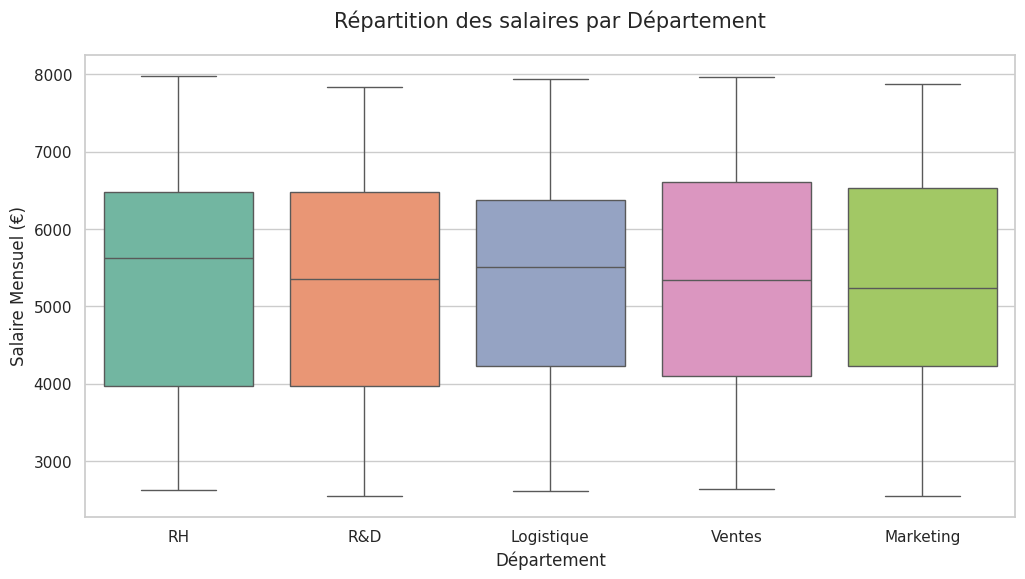

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# On définit le style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# On crée le Boxplot
sns.boxplot(x='Department', y='Monthly_Income', data=df, palette='Set2')

# On ajoute les titres pour le recruteur
plt.title('Répartition des salaires par Département', fontsize=15, pad=20)
plt.xlabel('Département', fontsize=12)
plt.ylabel('Salaire Mensuel (€)', fontsize=12)

plt.show()

Bien que le tableau croisée indique que la Logistique possède la moyenne la plus élevée, le Boxplot nous montre que la médiane des salaires en R&D et dans les Ventes est en réalité légèrement supérieure. Cela confirme que la moyenne de la Logistique est "gonflée" par le fait que tout le groupe gagne bien sa vie (la boîte est haute), alors que les autres départements ont des salaires plus dispersé.

#Le nombre de personnes ayant quitté l'entreprise pour chaque niveau d' Education.

In [36]:
df.loc[df['Left_Company'] == 'Yes'].groupby('Education')['Employee_ID'].count()

,Employee_ID
Education,
Bac,72
Doctorat,95
Master,98


In [42]:
# 3. Le Taux de Churn en %
departs = df.loc[df['Left_Company'] == 'Yes'].groupby('Education')['Employee_ID'].count()
total = df.groupby('Education')['Employee_ID'].count()
taux_churn = (departs / total) * 100

taux_churn.sort_values(ascending=False).round(2)

,Employee_ID
Education,
Doctorat,58.64
Master,56.65
Bac,43.64


 les profils les plus diplômés sont les plus volatils. Avec un taux de départ de 58.64% pour les détenteurs d'un Doctorat et 56.65% pour les Master, l'entreprise fait face à une "fuite des cerveaux" majeure. À l'inverse, les profils de niveau Bac affichent une plus grande stabilité (43.64%). Ce constat suggère la nécessité de revoir les politiques de rétention et les perspectives de carrière pour les hauts diplômés, afin de limiter la perte d'expertise technique.